In [0]:
!kill -9 -1

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...


In [0]:
!pip install -U -q PyDrive
# Generate auth tokens for Colab
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Generate creds for the Drive FUSE library.
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/


Files in Drive:
 20
'2016 black friday.ods'
 207
 21.pdf
 533final.odt
'cgifederal.secur...com - dropboxconfirmation.pdf'
 CN_Landmark_database
'Colab Notebooks'
'Copy of landmark.ipynb'
'dog boarding.ods'
 Dream.desktop
'English for hospital.ods'
'hiking with hao.odt'
'New York.desktop'
 prog4.pdf
 Resnet
 Resnet2
'Untitled map.desktop'
'Village At Overlake Station.desktop'
'what do I do for everyday.ods'
'Working Effectively with Legacy Code by Michael C Feathers.pdf'
 怀孕检查.odt


In [0]:
!pip install keras==2.1.3
!pip install h5py

    100% |████████████████████████████████| 327kB 24.7MB/s 
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [0]:
#!pip install -U --force-reinstall --no-dependencies git+https://github.com/datumbox/keras@bugfix/trainable_bn
#http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16357959345473311073, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11909171020697658557
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8799155291566492010
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7055823197323476595
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
!ls drive/20
# !cat drive/Resnet2/labels.txt


labels.txt  test  train


In [0]:
!pip install keras==2.1.3



In [0]:
!pip install -U coremltools

    100% |████████████████████████████████| 2.7MB 12.0MB/s 
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement six~=1.11.0, but you'll have six 1.10.0 which is incompatible.
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model,load_model
from keras.layers import Dense,GlobalAveragePooling2D,Input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adadelta
import keras
import math, os, sys
import matplotlib.pyplot as plt
import coremltools
from keras.applications.vgg19 import VGG19


def get_model():
  
    input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

    # create the base pre-trained model
#     base_model = ResNet50(input_tensor=input_tensor,weights='imagenet',include_top=False)
    base_model = VGG19(input_tensor=input_tensor,weights='imagenet',include_top=False)
    

    for layer in base_model.layers:
        layer.trainable=False

    x = base_model.output
    x = GlobalAveragePooling2D(data_format='channels_last')(x)
    x = Dense(num_classes, activation='softmax')(x)

    updatedModel = Model(base_model.input, x)

    return  updatedModel



def compile_model(compiledModel):

    compiledModel.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])


def modelFitGenerator(fitModel):

    num_train_samples = sum([len(files) for r, d, files in os.walk(train_data_dir)])
    num_valid_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir)])

    num_train_steps = math.floor(num_train_samples/batch_size)
    num_valid_steps = math.floor(num_valid_samples/batch_size)
    
    train_datagen = ImageDataGenerator(  
      rotation_range=90,      
      horizontal_flip=True,    
      vertical_flip=True,
      zoom_range=0.4)

    test_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', shuffle=True
    )

    validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', shuffle=True
    )

    print("start history model")
    history = fitModel.fit_generator(
      train_generator,
      steps_per_epoch=num_train_steps,
      epochs=nb_epoch,
      validation_data=validation_generator,
      validation_steps=num_valid_steps)
    
    printGraph(history)

def printGraph(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
     
    
# def main():
#     model = get_model()
#     compile_model(model)
#     modelFitGenerator(model)
#     saveCoreMLModel(model)


# if __name__ == '__main__':
#     # constants
#     image_size = (224, 224)
#     train_data_dir = 'drive/Resnet/landmark/train' 
#     validation_data_dir = 'drive/Resnet/landmark/test'
#     nb_epoch = 50
#     batch_size = 16
#     num_classes = 2
#     main()


Using TensorFlow backend.


In [0]:
keras.__version__

'2.1.3'

In [0]:
image_size = (224, 224)
train_data_dir = 'drive/20/train' 
validation_data_dir = 'drive/20/test'
nb_epoch = 50
batch_size = 16
num_classes = 20

80142336/80134624 [==============================] - 3s 0us/step
Found 1577 images belonging to 20 classes.
Found 523 images belonging to 20 classes.
start history model
Epoch 1/50
99/99 [==============================] - 1217s 12s/step - loss: 6.0408 - acc: 0.2050 - val_loss: 4.8273 - val_acc: 0.3136
Epoch 2/50
99/99 [==============================] - 61s 613ms/step - loss: 2.8263 - acc: 0.4407 - val_loss: 3.3052 - val_acc: 0.4665
Epoch 3/50
99/99 [==============================] - 60s 605ms/step - loss: 1.8292 - acc: 0.5833 - val_loss: 2.5565 - val_acc: 0.5641
Epoch 4/50
99/99 [==============================] - 62s 623ms/step - loss: 1.5210 - acc: 0.6448 - val_loss: 2.0947 - val_acc: 0.6061
Epoch 5/50
99/99 [==============================] - 62s 626ms/step - loss: 1.2522 - acc: 0.6835 - val_loss: 1.9316 - val_acc: 0.6291
Epoch 6/50
99/99 [==============================] - 63s 635ms/step - loss: 1.0587 - acc: 0.7315 - val_loss: 1.5580 - val_acc: 0.6616
Epoch 7/50
99/99 [==============

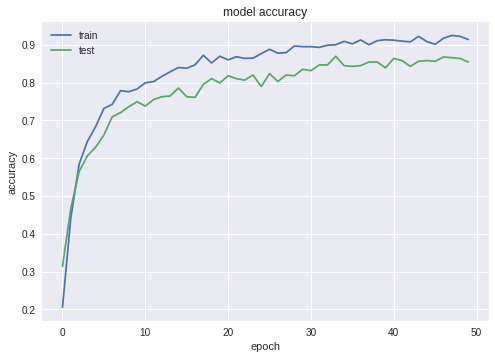

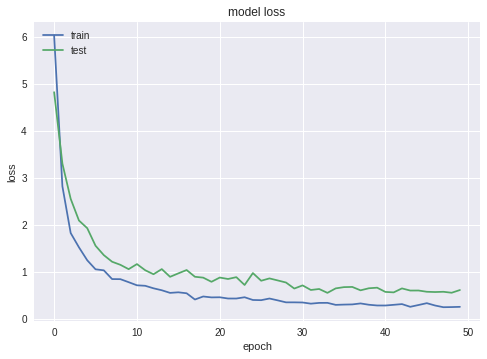

In [0]:
model = get_model()
compile_model(model)
modelFitGenerator(model)

In [0]:
def saveCoreMLModel(kerasModel):
    coreml_model = coremltools.converters.keras.convert(kerasModel,
                                                    input_names=['input'],
                                                    output_names=['probs'],
                                                    image_input_names='input',
                                                    predicted_feature_name='predictedlandmark',
                                                    class_labels = 'drive/20/labels.txt')
    coreml_model.save('resnet50custom.mlmodel') 
    print('CoreML model saved')
    
saveCoreMLModel(model)

0 : input_1, <keras.engine.topology.InputLayer object at 0x7f268f89a6d8>
1 : block1_conv1, <keras.layers.convolutional.Conv2D object at 0x7f268f89ae80>
2 : block1_conv1__activation__, <keras.layers.core.Activation object at 0x7f268bcd6588>
3 : block1_conv2, <keras.layers.convolutional.Conv2D object at 0x7f268f89ada0>
4 : block1_conv2__activation__, <keras.layers.core.Activation object at 0x7f268bcd6358>
5 : block1_pool, <keras.layers.pooling.MaxPooling2D object at 0x7f268f89ac18>
6 : block2_conv1, <keras.layers.convolutional.Conv2D object at 0x7f268f8bff98>
7 : block2_conv1__activation__, <keras.layers.core.Activation object at 0x7f268bcd6278>
8 : block2_conv2, <keras.layers.convolutional.Conv2D object at 0x7f268db27dd8>
9 : block2_conv2__activation__, <keras.layers.core.Activation object at 0x7f26f3254940>
10 : block2_pool, <keras.layers.pooling.MaxPooling2D object at 0x7f268da830f0>
11 : block3_conv1, <keras.layers.convolutional.Conv2D object at 0x7f268da9e668>
12 : block3_conv1__act

In [0]:
# from google.colab import files
# files.download('resnet50custom.mlmodel') 

In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('resnet50custom.mlmodel')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

Uploaded file with ID 162vZSmSaX8bvbmQKVvrZgLXROvThdstX
